## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Création des données d'entrainement

In [2]:
datas = []
labels = []
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


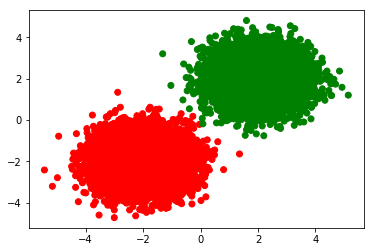

In [3]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [4]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [5]:
list(datas[0])+[labels[0]]

[-1.9381610372434073, -2.8358642470155697, 0.0]

In [6]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                   ord couleur
0      -1.9381610372434073   -2.8358642470155697     red
1       -2.494483913824592    -2.566592772500396     red
2       -2.928394196530367   -1.0766436106201707     red
3      -1.4158500023993732    -2.077001018575837     red
4      -0.8091794574831759   -0.6256717950565949     red
5      -2.6103802214971954   -1.1960888958384732     red
6      -1.7592428581934345   -2.1627211986115875     red
7      -2.2847011461247244    -1.554535151742381     red
8        -2.87304848863583    -2.361632609482925     red
9      -0.9029914327236956   -1.2992491781863311     red
10     -2.2831299497304403   -1.8599270180516083     red
11      -1.966338682039862   -1.3815032012898927     red
12       -0.74574124252947   -0.7897711949501685     red
13     -1.9354233096295936   -1.7729274536593778     red
14     -1.0029866393331215     -2.99063034177808     red
15      -1.323250298578951  -0.03519719305966573     red
16     -2.4720582803945286    -1.288163564396328     red
17      -2.098573166460078    -3.213594920919584     red
18     -0.6103451181514621    -2.502010753689986     red
19     -1.9075469009623391    -2.191559863196762     red
20      -0.625860226627504   -3.0577272369500195     red
21     -0.8773604041967884   -2.3972337045942846     red
22     -1.8562994824958794   -3.0399365234441422     red
23      -2.285241249315531   -1.6979406621956543     red
24     -1.7928514574942138   -1.4651593161683092     red
25     -1.3970809062065705     -0.91801832088437     red
26     -2.8672236599671175   -2.3700891592332445     red
27      -1.860994518255786   -2.8381391879843036     red
28     -3.3717077247814418   -1.6621198507710946     red
29     -1.5848967437708672    -3.002412474428603     red
...                    ...                   ...     ...
19970   2.9672170855081292    1.3884977163207126   green
19971    1.364065584722266    2.4024273390436797   green
19972     1.80989200840263    0.7115746336021107   green
19973    1.316210296373205     3.007277798412566   green
19974   1.7928093549803141     1.862899973314288   green
19975   2.2245602879021527    0.1965739203855792   green
19976   1.5272747169026264    2.9389892610520807   green
19977   1.3904185075792623     2.613049304989877   green
19978   1.7549149146860274     3.656329055712047   green
19979   2.0546252060837458    1.7878591006890558   green
19980   3.0421011698691345    2.3469448666081787   green
19981   0.6601996324245951    1.4714088670481567   green
19982   2.4678704638788482     0.893719288287564   green
19983    2.887592521805215    1.2706640733108592   green
19984    2.593101084829866    3.3586632441573787   green
19985    2.344688109631506    3.2246773995285754   green
19986   2.0080871505863676    1.3492390259784217   green
19987   3.1700270104487305     2.945636070083074   green
19988   1.7902496648976487    1.4638409761779103   green
19989    2.163572158070123    2.8831222233228546   green
19990    1.551171778888181    1.9481430103315671   green
19991    2.167443870686641     2.703681913123279   green
19992   1.5833840277381843     3.454692448745136   green
19993    1.848969591069362    1.6098368886418817   green
19994   1.8203514900338527      2.72851144712428   green
19995    3.313567836812889     2.252556480020431   green
19996    2.012377735036226     2.295553107500663   green
19997   2.1806735807245685     1.509428388272637   green
19998   1.4295309606571338    2.5380402083468816   green
19999    1.922488978770379    1.9612049187591598   green

[20000 rows x 3 columns]

## Création du modèle

In [7]:
# model creation
model = tf.keras.models.Sequential()

### Ajout d'une couche de 2 neurones

In [8]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Exemple de prédiction sans entraînement

In [14]:
# output example
print ((datas[0:1]))
model_output = model.predict(np.array(datas[0:1]))
print("prediction :", model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

[[-1.93816104 -2.83586425]]
prediction : [[0.0426862  0.95731384]]
Found :  1
Should be :  0.0


## Résumé du modèle (couche de neurones)

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [16]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [17]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [18]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 1s 90us/sample - loss: 0.1329 - acc: 0.9577 - val_loss: 0.0268 - val_acc: 0.9995
Epoch 2/10
16000/16000 [==============================] - 1s 84us/sample - loss: 0.0168 - acc: 0.9999 - val_loss: 0.0153 - val_acc: 0.9998
Epoch 3/10
16000/16000 [==============================] - 1s 85us/sample - loss: 0.0109 - acc: 0.9999 - val_loss: 0.0111 - val_acc: 0.9998
Epoch 4/10
16000/16000 [==============================] - 1s 82us/sample - loss: 0.0083 - acc: 0.9999 - val_loss: 0.0089 - val_acc: 0.9998
Epoch 5/10
16000/16000 [==============================] - 1s 85us/sample - loss: 0.0069 - acc: 0.9999 - val_loss: 0.0076 - val_acc: 0.9998
Epoch 6/10
16000/16000 [==============================] - 1s 83us/sample - loss: 0.0059 - acc: 0.9999 - val_loss: 0.0066 - val_acc: 0.9998
Epoch 7/10
16000/16000 [==============================] - 1s 86us/sample - loss: 0.0052 - acc: 0.9999 - val_loss: 0.0

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

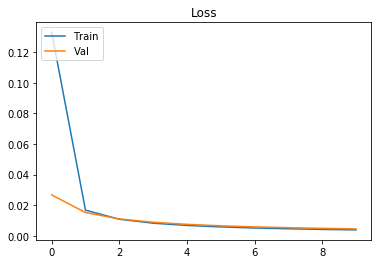

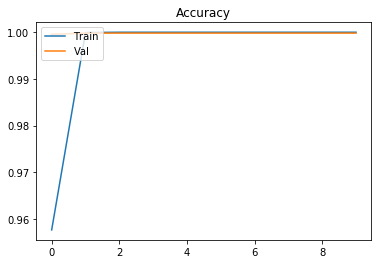

In [19]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [20]:
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

[[6.8619597e-04 9.9931383e-01]
 [9.9955529e-01 4.4468418e-04]]


['green', 'red']

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [21]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

[[0.5540432  0.4459569 ]
 [0.44498566 0.5550143 ]
 [0.34098127 0.6590187 ]]


['darkred', 'chartreuse', 'chartreuse']

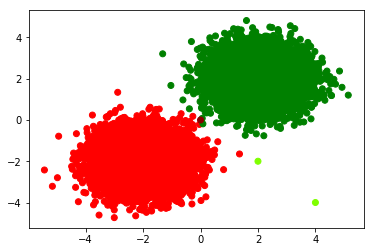

In [22]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant datas et labels, pour tester le modèle précédent

In [23]:
# example
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 1ms/sample - loss: 5.6560e-04 - acc: 1.0000
Test Loss 0.0005655999993905425
Test Accuracy 1.0


In [29]:

nbr_points = 1000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels_test = np.array(labels).ravel()
datas_test = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])

loss, acc=model.evaluate(datas_test,labels_test)
print("test Loss", loss)
print("Test Accuracy", acc)

2000/2000 [==============================] - 0s 20us/sample - loss: 0.0040 - acc: 1.0000
test Loss 0.003971370189450681
Test Accuracy 1.0


[[9.9975520e-01 2.4483993e-04]
 [9.9980718e-01 1.9280020e-04]
 [9.9971622e-01 2.8376130e-04]
 ...
 [3.3318886e-04 9.9966681e-01]
 [3.5264155e-05 9.9996471e-01]
 [3.1493548e-03 9.9685067e-01]]


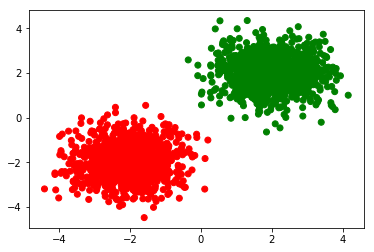

In [30]:

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()


## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [81]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

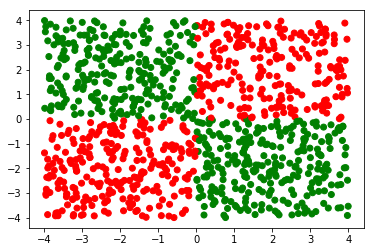

In [82]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [83]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [84]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [85]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

[[-0.87341028  1.8592547 ]]
[[0.5291465  0.47085348]]
Found :  red
Should be :  green


## Résumé du modèle (couches de neurones)

In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             multiple                  12        
_________________________________________________________________
dense_12 (Dense)             multiple                  10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [87]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [88]:
history = model.fit(datas, labels, epochs=100, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 353us/sample - loss: 0.8361 - acc: 0.5163 - val_loss: 0.7726 - val_acc: 0.4700
Epoch 2/100
800/800 [==============================] - 0s 115us/sample - loss: 0.7437 - acc: 0.6050 - val_loss: 0.6999 - val_acc: 0.6950
Epoch 3/100
800/800 [==============================] - 0s 52us/sample - loss: 0.6898 - acc: 0.7175 - val_loss: 0.6558 - val_acc: 0.7600
Epoch 4/100
800/800 [==============================] - 0s 47us/sample - loss: 0.6545 - acc: 0.7400 - val_loss: 0.6251 - val_acc: 0.7950
Epoch 5/100
800/800 [==============================] - 0s 121us/sample - loss: 0.6277 - acc: 0.7550 - val_loss: 0.6008 - val_acc: 0.8200
Epoch 6/100
800/800 [==============================] - 0s 122us/sample - loss: 0.6044 - acc: 0.7513 - val_loss: 0.5791 - val_acc: 0.8250
Epoch 7/100
800/800 [==============================] - 0s 132us/sample - loss: 0.5827 - acc: 0.7675 - val_loss: 0.5584 - val_acc: 0.84

800/800 [==============================] - 0s 152us/sample - loss: 0.2311 - acc: 0.9237 - val_loss: 0.2220 - val_acc: 0.9500
Epoch 61/100
800/800 [==============================] - 0s 93us/sample - loss: 0.2294 - acc: 0.9237 - val_loss: 0.2198 - val_acc: 0.9500
Epoch 62/100
800/800 [==============================] - 0s 119us/sample - loss: 0.2277 - acc: 0.9250 - val_loss: 0.2178 - val_acc: 0.9500
Epoch 63/100
800/800 [==============================] - 0s 121us/sample - loss: 0.2260 - acc: 0.9262 - val_loss: 0.2158 - val_acc: 0.9450
Epoch 64/100
800/800 [==============================] - 0s 125us/sample - loss: 0.2243 - acc: 0.9250 - val_loss: 0.2137 - val_acc: 0.9450
Epoch 65/100
800/800 [==============================] - 0s 116us/sample - loss: 0.2227 - acc: 0.9275 - val_loss: 0.2118 - val_acc: 0.9450
Epoch 66/100
800/800 [==============================] - 0s 120us/sample - loss: 0.2211 - acc: 0.9300 - val_loss: 0.2099 - val_acc: 0.9450
Epoch 67/100
800/800 [==========================

## Le modèle est-il bien entraîné ?

In [89]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [90]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

1000/1000 [==============================] - 0s 24us/sample - loss: 0.1876 - acc: 0.9390
Test Loss 0.18759459805488587
Test Accuracy 0.939


[[0.0134346  0.9865654 ]
 [0.9798697  0.0201303 ]
 [0.5568277  0.44317228]
 ...
 [0.9464343  0.05356572]
 [0.9113743  0.08862571]
 [0.776483   0.22351702]]


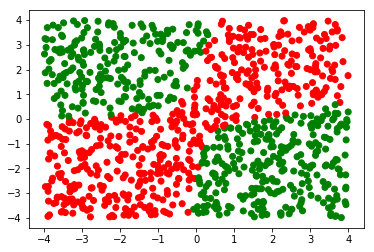

In [91]:
model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()

### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [ ]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

In [ ]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant